<h1> Twitter Analysis


In [209]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# sklearn supervised learning
from sklearn.feature_extraction.text import CountVectorizer     # may have to delete this buggar
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# sklearn bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# nltk stopwords (incl. german)
import nltk
#nltk.download("stopwords") 
from nltk.corpus import stopwords


In [210]:
# load the dataset
df = pd.read_csv(r'C:\Users\aedan\Data Science Notebooks\Twitter Analysis\sns_twitter_data.csv')
df

,Date,User,Tweet
0,04/11/2022 13:49,Linksfraktion,.@LoetzschMdB: Ex-Bundeskanzler brauchen keine...
1,04/11/2022 12:36,SWagenknecht,Mehr #Diplomatie wagen! Diesem Wunsch einer g...
2,04/11/2022 11:12,SWagenknecht,Abschied von der liberalen Gesellschaft? Im Vi...
3,04/11/2022 08:00,Linksfraktion,"Etwas gesunde Distanz, auch zum eigenen Ego,&a..."
4,03/11/2022 18:15,SWagenknecht,"Grotesk, wie die #Ukraine den brutalen Krieg a..."
...,...,...,...
178693,27/09/2017 20:40,AfDimBundestag,Die #AfD-Fraktion im 19. Deutschen Bundestag w...
178694,27/09/2017 20:35,AfDimBundestag,Die #AfD will im Einklang mit dem Grundgesetz ...
178695,26/09/2017 19:19,AfDimBundestag,+++Dr. @Alice_Weidel &amp; Dr. Alexander Gaula...
178696,26/09/2017 12:10,AfDimBundestag,"93 #AfD-Abgeordnete beraten die Satzung, danac..."


<h3> Data cleaning and manipulation

Before we start we need to classify into tweets from the Afd and Die Linke.

In [211]:
# creating a dictionary
party_dict = {'AndreasKalbitz': 'AfD', 'M_HarderKuehnel': 'AfD', 'AfDProtschka': 'AfD', 'StBrandner': 'AfD', 'P_Plattform': 'AfD', 
        'BjoernHoecke': 'AfD', 'Alice_Weidel': 'AfD', 'Tino_Chrupalla': 'AfD', 'Beatrix_vStorch': 'AfD', 'Frohnmaier_AfD': 'AfD',
        'AfD': 'AfD', 'AfDimBundestag': 'AfD','dieLinke': 'Die_Linke', 'Linksfraktion': 'Die_Linke', 
        'Janine_Wissler':'Die_Linke', 'katjakipping': 'Die_Linke', 'SWagenknecht': 'Die_Linke', 'GregorGysi': 'Die_Linke', 
        'DietmarBartsch': 'Die_Linke', 'Amira_M_Ali': 'Die_Linke', 'schirdewan': 'Die_Linke', 'bodoramelow': 'Die_Linke', 
        'lgbeutin': 'Die_Linke', 'SusanneHennig': 'Die_Linke', 'PetraPauMaHe': 'Die_Linke'}

# adding a new column named 'Party'
df['Party'] = df['User'].map(party_dict)
df.head(6)

,Date,User,Tweet,Party
0,04/11/2022 13:49,Linksfraktion,.@LoetzschMdB: Ex-Bundeskanzler brauchen keine...,Die_Linke
1,04/11/2022 12:36,SWagenknecht,Mehr #Diplomatie wagen! Diesem Wunsch einer g...,Die_Linke
2,04/11/2022 11:12,SWagenknecht,Abschied von der liberalen Gesellschaft? Im Vi...,Die_Linke
3,04/11/2022 08:00,Linksfraktion,"Etwas gesunde Distanz, auch zum eigenen Ego,&a...",Die_Linke
4,03/11/2022 18:15,SWagenknecht,"Grotesk, wie die #Ukraine den brutalen Krieg a...",Die_Linke
5,03/11/2022 12:55,Linksfraktion,.@christian_leye: #Gaspreisbremse droht zu spä...,Die_Linke


In [212]:
# making sure date is a datetime variable
df['Date'] = pd.to_datetime(df['Date'])

# setting the index to our data variable
df = df.set_index(['Date'])
df.head(2)

,User,Tweet,Party
Date,,,
2022-04-11 13:49:00,Linksfraktion,.@LoetzschMdB: Ex-Bundeskanzler brauchen keine...,Die_Linke
2022-04-11 12:36:00,SWagenknecht,Mehr #Diplomatie wagen! Diesem Wunsch einer g...,Die_Linke


<h3> Tweet Analysis

Text(0.5, 0.98, 'Number of Tweets by Party')

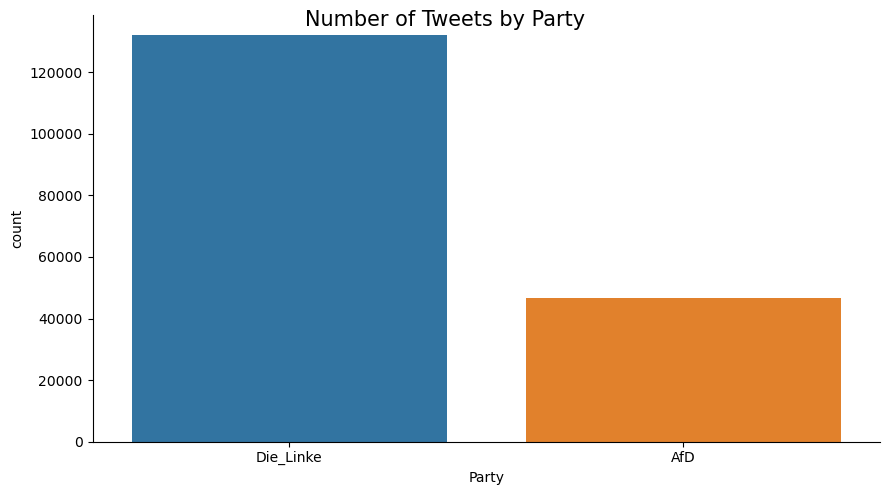

In [388]:
# plotting number of tweets by party
sns.catplot(data=df, kind='count', x='Party',aspect=1.8)
plt.suptitle('Number of Tweets by Party',fontsize=15,fontweight=100)

My sample has many more tweets from die Linke than from the AfD. This suggests that the leading politicians of die Linke are far more frequent Twitter users than those of the AfD.

In [389]:
# slicing the df into part afd and part linke
dfl = df[df['Party'] == 'Die_Linke']
print(dfl.shape)

dfa = df[df['Party'] == 'AfD']
print(dfa.shape)

(132060, 3)
(46638, 3)


In [390]:
# top tweeters afd
dfa.User.value_counts()

StBrandner         19359
Beatrix_vStorch     7245
AfDimBundestag      7216
AfDProtschka        3828
AfD                 2735
Alice_Weidel        2289
BjoernHoecke         935
Tino_Chrupalla       914
Frohnmaier_AfD       756
P_Plattform          681
M_HarderKuehnel      414
AndreasKalbitz       266
Name: User, dtype: int64

In [391]:
# top tweeters die linke
dfl.User.value_counts()

bodoramelow       28664
Linksfraktion     24426
lgbeutin          20047
dieLinke          13948
PetraPauMaHe      11120
Janine_Wissler    10113
katjakipping       7130
DietmarBartsch     5306
SusanneHennig      3590
schirdewan         2695
GregorGysi         2133
SWagenknecht       2121
Amira_M_Ali         767
Name: User, dtype: int64

We can see that for the AfD Stephan Brander is very active on Twitter and that overall politicians of die Linke use Twitter much more frequently.

<h4> Time Analysis

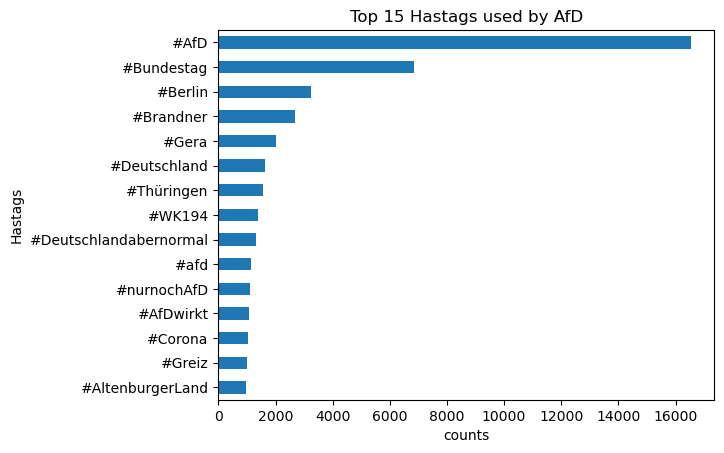

In [392]:
# visualising top hastags afd
dfa.Tweet.str.extractall(r'(\#\w*)')[0].value_counts()[:15].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 Hastags used by AfD')
plt.xlabel('counts')
plt.ylabel('Hastags')
plt.show()

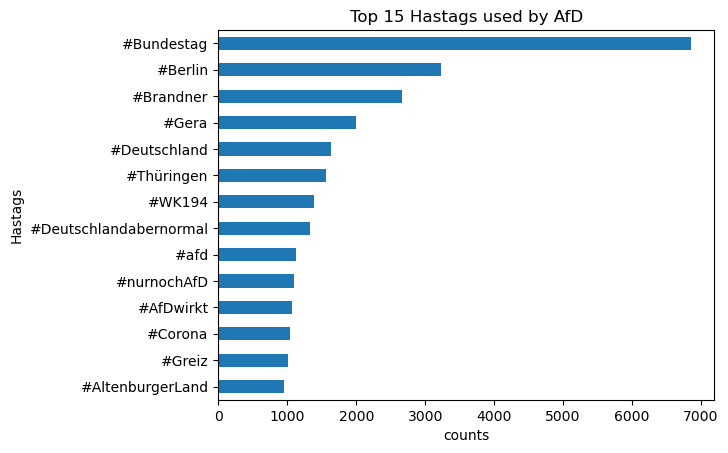

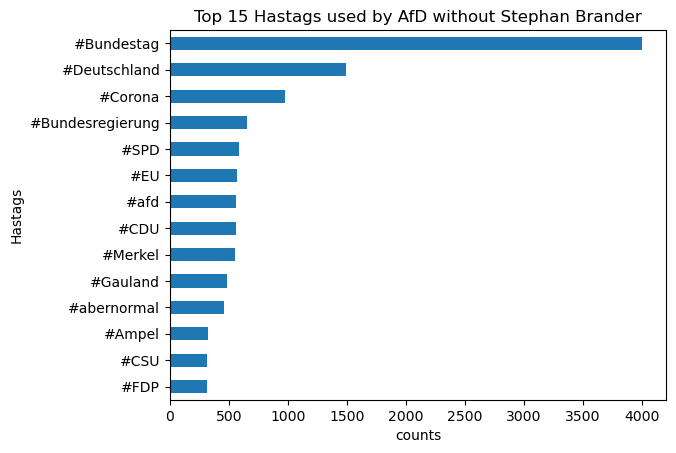

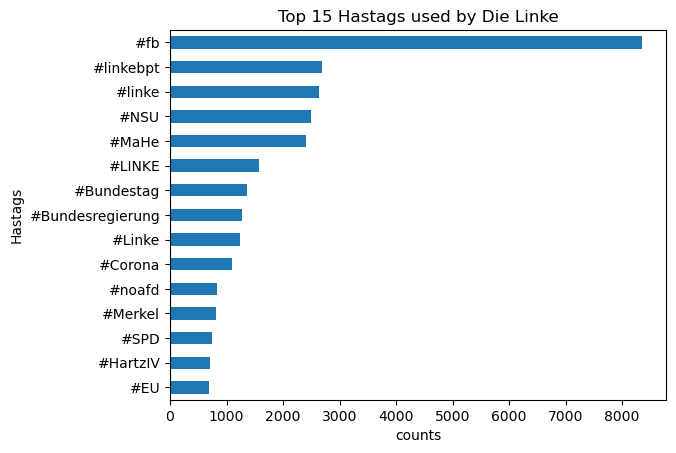

In [393]:
# visualising top hastags of afd
dfa.Tweet.str.extractall(r'(\#\w*)')[0].value_counts()[1:15].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 Hastags used by AfD')
plt.xlabel('counts')
plt.ylabel('Hastags')
plt.show()

# exluding stephan brander from the afd plot as his tweets will lead to strong biases, because he is by far the most active on twitter
# visualising top hastags of afd
dfa[dfa['User'].str.contains('StBrandner') == False ].Tweet.str.extractall(r'(\#\w*)')[0].value_counts()[1:15].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 Hastags used by AfD without Stephan Brander')
plt.xlabel('counts')
plt.ylabel('Hastags')
plt.show()

# visualising top hastags die linke
dfl.Tweet.str.extractall(r'(\#\w*)')[0].value_counts()[:15].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 Hastags used by Die Linke')
plt.xlabel('counts')
plt.ylabel('Hastags')
plt.show()

Overall, we can see that the hastags used are quite different, but they do share som similarities, We can divide the topics in the following groups:

**1. Opposition Work (AfD and Linke)**

Both parties use hastags to critise the government, such as #CDU, #Bundestag, #SPD and #Merkel. Likewise, the Linke use #GroKo, #Ampel and #Bundesregierung, whereas the #AfD uses #Berlin. This is typical for opposition parties as they want to make themselves look best by critising the government. These hashtags, however, do not tell us anything about the topic they talk about, but only the direction at who the critism is pointed at.

**2. Left Wing Politics (only Linke)**

This is a domain only used by the Linke. Hashtags include, #HartzIV, #IchBinArmutsbetroffen. These are all central topics of the left wing party. They are not happy with #HartzIV, the german unemployment benefit, and would like to increase it. Similarly, #IchBinArmutsbetroffen refers to young people and old pensioners who are on the brisk of becomming poor as they loose their job, have a low pension or are exposed to high energy or food prices.

2.1 **Anti right wing**

We also see that the Linke are using specific hashtags, such as #noafd or #NSU. Parties especially on the left spectrum in Germany hold a very vocal stance against right wing extremist positions.

**3. Right Wing Politics (only AfD)**

Just like the previous point, within this category are only hastags used by the AfD, such as #Deutschland #Deutschlandabernormal. These two hashtags show the importance of the nationalism within the AfD party. Of couse, using the hashtag for Germany should not directly indicate right wing politics, but we know that the AfD is a far right party and they want to change Germany for the better in their eyes. They also hold controversly opionions about the Erinnerungskultur (Culture of Remembrance), which describes the interaction of a society with their past. They believe the soldiers of Nazi Germany should be remembered in a better light than they are currently.

Additionally, #Deutschlandabernormal refers to the AfD advertising slogan. In their advertisment video they talk about the problems with the Euro, open boarders, how Germany should rely on innovation to stop the climate change, the pandemic and how the government does not help the small people with their buisnesses, but only big corporations. The light in which these topics are represented clearly show a right wing ideology.

Other hashtags as #Greiz and especially #Gera (which are only present in the plot with Stephan Brander) refer to the rightwing extremist demonstrations of the town Gera in Thüringen east Germany. In response to these demonstrations the president of the office for the defense of the constitution in Thüringen, Stephan Krahmer, states that radicalisation and the threshold to use violence has decreased significantly. AfD politicans use this hashtag to show their support for this movement.

<h3> Word Clouds

<h4> AfD Word Cloud

There are 8159911 words in the combination of all review.


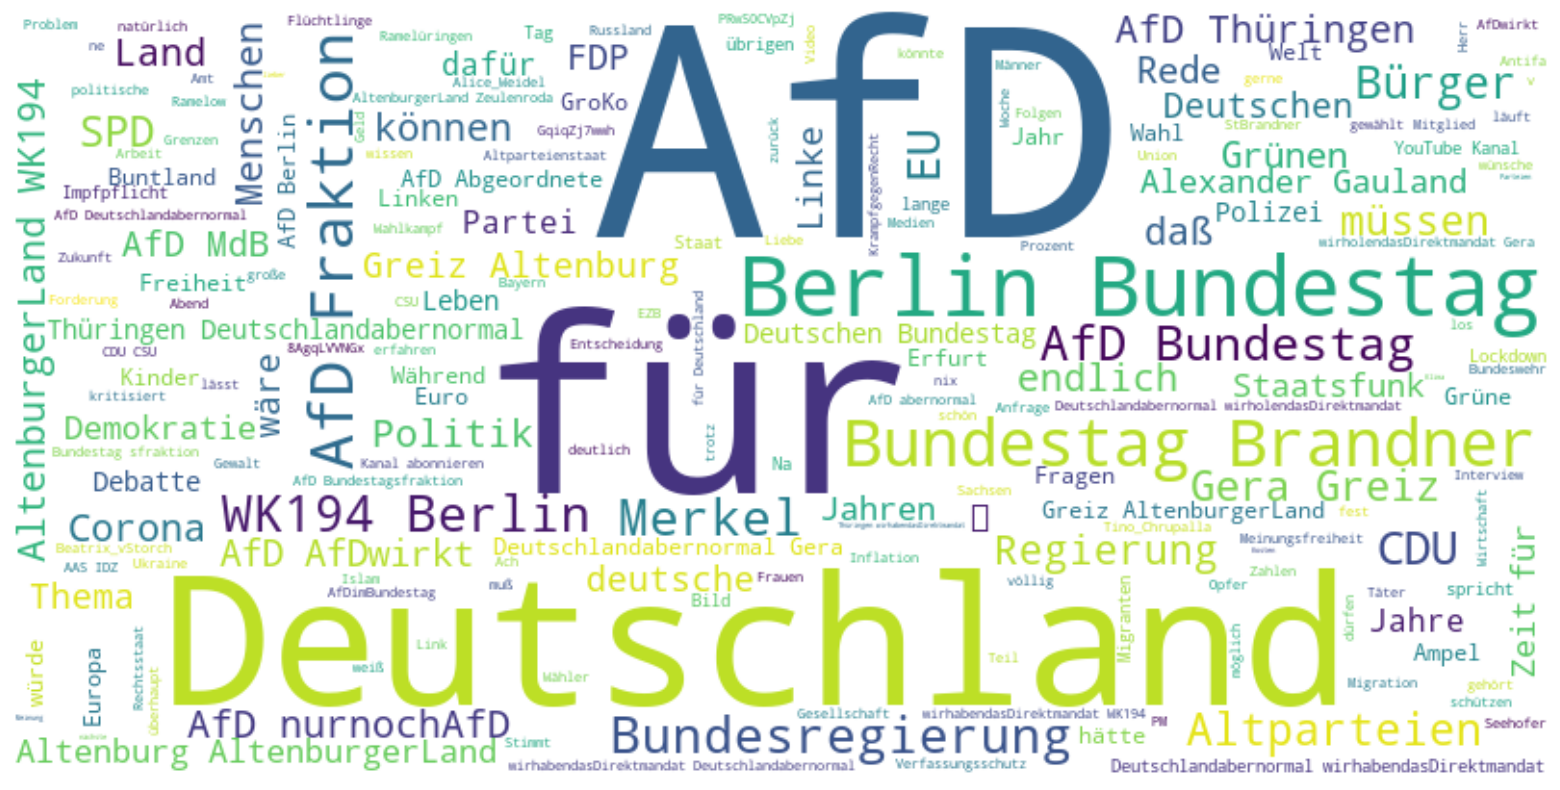

In [394]:
# combining all job descriptions into one text
text = " ".join(tweet for tweet in dfa.Tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

# creating a stopword list
stopwords = set(STOPWORDS)

# updating the stopwords according to a stopwords file 
text_file = open('german_stopwords_full.txt', 'r')
for line in text_file:
    stopwords.add(line.strip('\n'))

# adding other stopwords
stopwords.update(['https','t', 'co', 'über', 'looking', 'bieten', 'offer','and', 'RT', 'u', 'amp', 'Uhr', 's', 'erklärt', 'stellt', 'zeigt',
                'Frage', 'richtig', 'stehen', 'Antrag', 'stellen', 'Antwort', 'd', 'zeigen', 'zeigen', 'unterstützen', 'offenbar', '-'])

# setting the word cloud
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the word cloud we can see that a central topic of the AfD ist Germany ('Deutschland') and their Citiziens ('Bürger', 'Deutsche'). 
The pandemic also pops up with 'Corona'.Other than that we see various a bunch of other parties in the word cloud, which are likely being critisied by the AfD members and we can also see 'Linke', which suggest that the AfD is also critising the Linke just like they do to the AfD.

There are 20471017 words in the combination of all review.


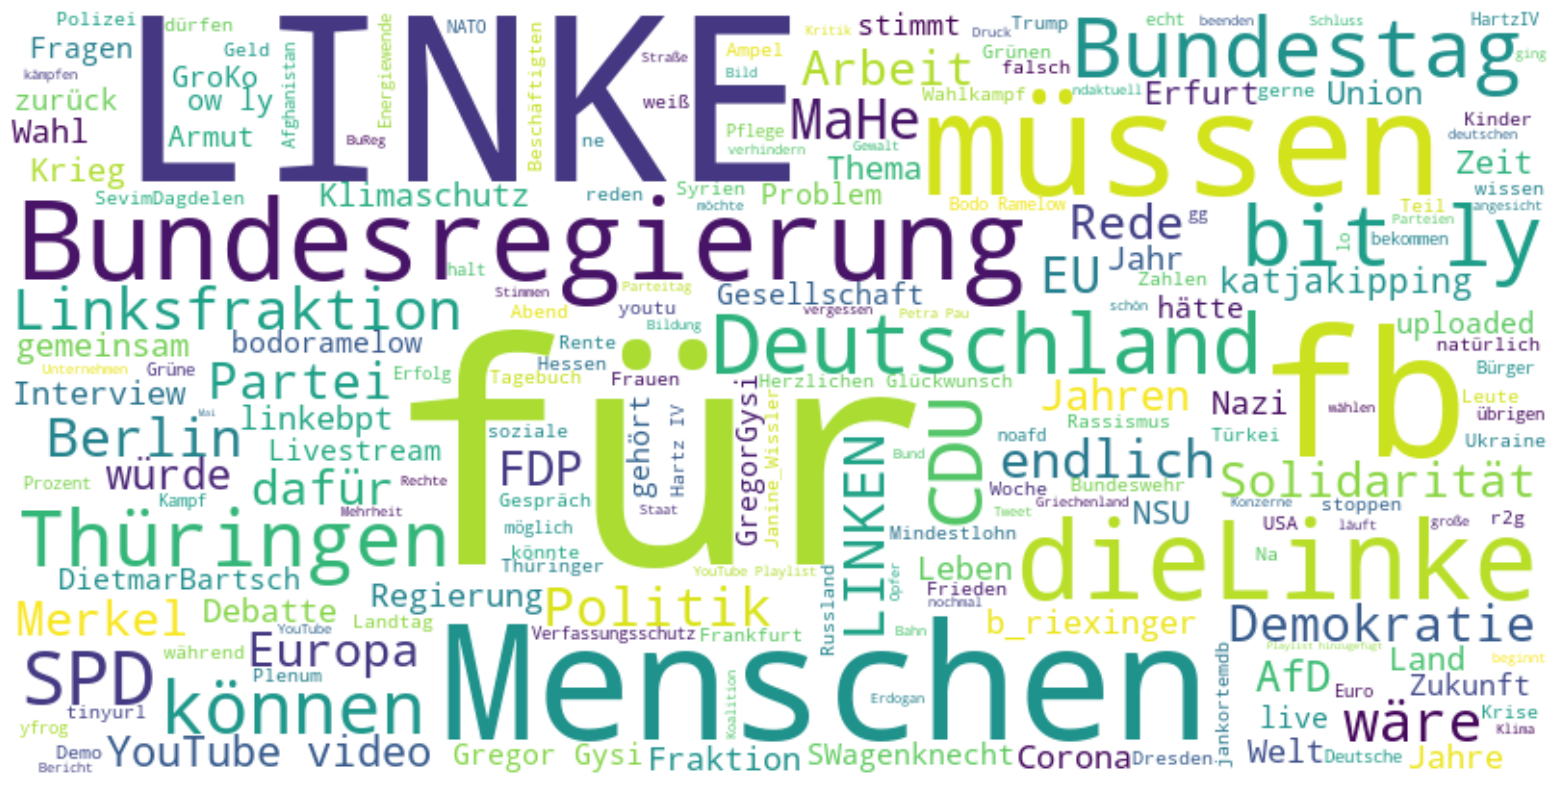

In [395]:
# combining all job descriptions into one text
text = " ".join(tweet for tweet in dfl.Tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

# creating a stopword list
stopwords = set(STOPWORDS)

# updating the stopwords according to a stopwords file 
text_file = open('german_stopwords_full.txt', 'r')
for line in text_file:
    stopwords.add(line.strip('\n'))

# adding other stopwords
stopwords.update(['https','t', 'co', 'über', 'looking', 'bieten', 'offer','and', 'RT', 'u', 'amp', 'Uhr', 's', 'erklärt', 'stellt', 'zeigt',
                'Frage', 'richtig', 'stehen', 'Antrag', 'stellen', 'Antwort', 'd', 'zeigen', 'zeigen', 'unterstützen', 'offenbar', '-', 'heißt',
                'spricht','n', 'v', 'lieber', 'lässt', 'Tag', 'deutlich','liebe', 'lange', 'treffen','freue', 'wünsche', 'Ga', 'e'])

# setting the word cloud
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the two wordclouds we can immediatly see the most important difference between the right and the left. In the word cloud of the AfD, besides their party specific words (AfD etc.), the most used word was 'Deutschland'. Whereas, for the Linke it is 'Menschen' ('People'). In essence, the right sees differences between people and wants to keep it that way. Thats why the politics of the AfD are centered around Germany only. On the otherhand, left wing parties see people as equals and strives to decrease existing inequalities. This is why politicians of the left are usually pro immigration and want to increase taxes.

Other than that we also see politicians of the left criritising other parties and the government by using words such as 'CDU', 'Bundesregierung' or 'Merkel'. However, the contents of the critism of likely to be very different.

<h2> Naive Bayes Classifer for right wing and left wing tweets

In the following we will implement a Naive Bayes model (NBC) that will allow us to classify a tweet as right or left, i.e. a tweet by the AfD or die Linke. A NBC is commonly used in NLP and despite its simple design it has worked well in many real world complex problems.

Now I will create a series to store the labels. I will not create new labels called 'left' and 'right', but will refer to the column that specifies the party. So, AfD and die Linke. I do this to not further complicate my dataframe and potential slow down the performance. Hence, the political position left will be synonym with die Linke, and the politicial position on the right with AfD.

We then construct a CountVectorizer to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

1. CountVectorizer

In [396]:
# creating a series to store the labels
y = df.Party

# creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], y, test_size=0.33, random_state=53)

# initializing a CountVectorizer object
stop = set(nltk.corpus.stopwords.words('german'))
count_vectorizer = CountVectorizer(stop_words=stop)

# transforming the training data using only the 'tweet' column values 
count_train = count_vectorizer.fit_transform(X_train)

# transforming the test data using only the 'tweet' column values 
count_test = count_vectorizer.transform(X_test)

# printing the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names_out()[:10])

['00' '000' '0000' '000de' '000e' '000en' '000er' '000ew' '000fach'
 '000menschen']


In [397]:
# instantiating a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# fitting the classifier to the training data
nb_classifier.fit(count_train, y_train)

# creating the predicted tags
pred = nb_classifier.predict(count_test)

# calculating the accuracy score
score = metrics.accuracy_score(y_test, pred)
print(score)

# calculating the confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['AfD', 'Die_Linke'])
print(cm)

0.925217479778196
[[11632  3745]
 [  665 42929]]


From the confusion matrix we can see that 482 left wing tweets have have been incorrectly labeled as right wing tweets. And 4335 right wing tweets have been labeled incorrectly as left wing tweets. We can also see that our dataset has significantly more left wing tweets than right wing tweets. This skewness might explain why our model predicts the left wing tweets more accurately.

This score will be our benchmark model to which we compare further models.

2. Tfidf Vector

Another more sophisticated approach is using Tfidf vectors, which stands for term frequency-inverse document frequency. It is a statistic that is based on frequencies of words in the corpus, but importantly gives weight to the importance of the word. It gives words which are too abundant and too rare in the corpus low weights.

In [399]:
# initializing the Vectorizer
vectorizer = TfidfVectorizer(stop_words=stop, max_df=0.7)

# fiting and transforming the train and transform the test
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

# fiting the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# creating the predicted tags
pred = nb_classifier.predict(tfidf_test)

# calculating the accuracy score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['AfD', 'Die_Linke'])
print(cm)

0.8362415424530701
[[ 5752  9625]
 [   32 43562]]


In [400]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, .1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0


c:\Users\aedan\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Score:  0.8964067083820861

Alpha:  0.1
Score:  0.9079886723982975

Alpha:  0.2
Score:  0.8988485865934103

Alpha:  0.30000000000000004
Score:  0.8876227298163504

Alpha:  0.4
Score:  0.8770921300300147

Alpha:  0.5
Score:  0.868359023927015

Alpha:  0.6000000000000001
Score:  0.8603211748147395

Alpha:  0.7000000000000001
Score:  0.8533007749571824

Alpha:  0.8
Score:  0.8472130369164504

Alpha:  0.9
Score:  0.8414474911397127



We can see that using an alpha of 0.1 gives us the highest precision score of 90.8%. However, this is still lower than that of the Countvector approach.
Next we will ahve a deeper look into the top weighted features for our labels. We will map the important vector weights back to actual words.

In [401]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])


c:\Users\aedan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\aedan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


AfD [(-13.12432862680677, '0000'), (-13.12432862680677, '000en'), (-13.12432862680677, '000ste'), (-13.12432862680677, '000sten'), (-13.12432862680677, '0026'), (-13.12432862680677, '004'), (-13.12432862680677, '007'), (-13.12432862680677, '00dssjkzyp'), (-13.12432862680677, '00gasnve8y'), (-13.12432862680677, '00iawywttw'), (-13.12432862680677, '00min'), (-13.12432862680677, '00pn6xdh3g'), (-13.12432862680677, '00sbk2bk7u'), (-13.12432862680677, '00sux0qead'), (-13.12432862680677, '00tgk5qycq'), (-13.12432862680677, '0108'), (-13.12432862680677, '012'), (-13.12432862680677, '01589'), (-13.12432862680677, '015aqo64ti'), (-13.12432862680677, '015zdjkzfx')]
Die_Linke [(-7.237127482578242, 'gibt'), (-7.233129452882752, 'youtube'), (-7.162163510332668, 'nsu'), (-7.099479409374622, 'linksfraktion'), (-7.047183632452702, 'mal'), (-7.0294130161101664, 'menschen'), (-7.022049381448129, 'danke'), (-6.993448533286156, 'ly'), (-6.9254689739475985, 'linkebpt'), (-6.871301996829833, 'geht'), (-6.82